In [1]:
# Importar as bibliotecas necessarias:
from scipy.integrate import odeint
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Implementacao de parametros

hs = 10 # coeficiente de tranferencia convectiva agua/ar
As = 0.005 # Area superficie de contato fazer ajuste na area do cilindro
Ta = 26 + 273 # Temperatura ambiente
dr = 0.01 / 2 # Espessura do recipiente
kr = 50 # Condutividade termica da porcelana
Ar = 0.0424 # Area de contato externa da xicara
hp = 2 # Coeficiente de conveccao termica das paredes p/ o ar
Ap = Ar
ma = 0.0003
ca = 4200 # calor especifico da agua
mx = 0.3 # massa do recipiente
cx =  1079 # calor especifico da porcelana
Tci = 80 + 273 # Temperatura inicial da cafe + Kelvin
Txi = 80 + 273 # Temperatura da Xicara + Kelvin






In [3]:
# Implementacao da Funcao em Python

def modelo(x, t):
    Tc = x[0]
    Tx = x[1]
    Qs = (Tc - Ta) / (1 / (hs * As))
    Qr = (Tc - Tx) / (dr/(kr * Ar))
    Qp = (Tx - Ta) / ((dr / (kr * Ar)) + (1 / (hp * Ap)))
    dTcdt = (-Qs - Qr) / (ma * ca)
    dTxdt = (Qr - Qp) / (mx * cx)
    dxdt = [dTcdt , dTxdt]
    return dxdt


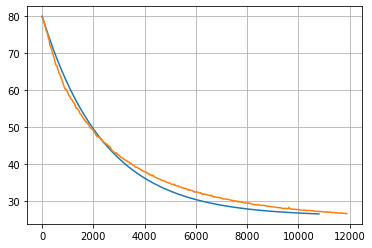

[353.         352.99817692 352.99687253 ... 299.61236936 299.6123691
 299.61236885]


In [5]:
lisTempo = np.arange(0, 60*60*3,0.001)
ci =  [Tci, Txi]
x = odeint(modelo, ci, lisTempo)
TCC = x[:,0]
TXX = x[:,1]
plt.plot(lisTempo, TCC-273,label = "Modelo")






lisTempoMedido= np.arange(0,11910,30)
#é a lista das temperaturas mediddas ao longo do tempo
lisTemperaturaMedida=[79677,79355,78495,78172,77204,76237,75806,75269,74194,73656,72151,71828,71183,70430,69677,69140,68387,67419,66774,66667,65806,65376,64624,64301,63871,63118,62581,62043,61290,60753,60323,60323,60000,59570,59032,58495,58387,57849,57527,57419,56882,56667,56344,55914,55161,55161,55054,54731,54409,53763,53656,53333,52903,52581,52366,51935,51828,51398,51398,50968,50860,50538,49892,49892,49677,49570,49247,49032,48602,48387,47957,47634,47419,47419,47419,47312,46989,46882,46452,46129,45806,45806,45806,45484,45484,45269,45054,44839,44839,44409,43978,43763,43441,43441,43226,43118,42903,43118,42581,42581,42473,42151,42043,41828,41720,41720,41398,41290,41290,40968,40968,40753,40645,40645,40323,40215,40215,40000,39785,39677,39570,39247,39247,39247,39140,38925,38925,38710,38602,38495,38280,38280,38065,38065,38065,37849,37742,37634,37527,37204,37312,37097,37097,36882,37097,36774,36667,36452,36452,36344,36237,36129,36129,36022,35914,35699,35699,35591,35591,35484,35376,35269,35161,35161,35054,34946,34946,34839,34624,34624,34624,34516,34624,34301,34301,34194,34194,34194,33978,33871,33871,33871,33656,33656,33548,33548,33441,33441,33441,33118,33118,33226,33011,33011,33011,32903,32796,32688,32581,32473,32581,32581,32473,32473,32366,32258,32366,32151,32043,31828,32043,31935,31935,31828,31828,31720,31720,31613,31613,31505,31720,31398,31398,31183,31290,31183,31183,31075,31075,31075,31075,30968,30968,30860,30860,30753,30645,30645,30645,30645,30538,30538,30538,30538,30430,30323,30323,30323,30108,30108,30215,30108,30108,30000,30108,29785,29892,30000,29892,29785,29785,29785,29677,29570,29570,29570,29570,29570,29462,29570,29462,29462,29355,29247,29247,29140,29140,29140,29032,29032,29140,29140,29032,29032,28925,28925,28925,28925,28925,28817,28925,28817,28710,28710,28602,28710,28602,28602,28602,28495,28495,28495,28495,28387,28387,28387,28280,28387,28280,28280,28280,28172,28172,28065,28065,28065,28172,28065,28065,27957,28065,28387,28065,27957,27957,27849,27957,27849,27849,27849,27849,27742,27849,27742,27742,27742,27634,27634,27634,27634,27634,27634,27634,27527,27527,27527,27527,27527,27527,27527,27527,27419,27527,27419,27312,27312,27312,27312,27312,27312,27204,27312,27312,27204,27204,27204,27204,27097,27097,27097,27204,27097,27097,27097,27097,27097,26989,26989,26989,26989,26989,26989,26882,26882,26882,26882,26882,26774,26882,26882,26882,26774,26774,26774,26774,26774,26667
]
i=0
while i < len( lisTemperaturaMedida):
    lisTemperaturaMedida[i]=  lisTemperaturaMedida[i]/1000
    i+=1
   

plt.plot(lisTempoMedido, lisTemperaturaMedida,label="Experimento")
plt.grid(True)
plt.legend()
plt.show()





print(TCC)


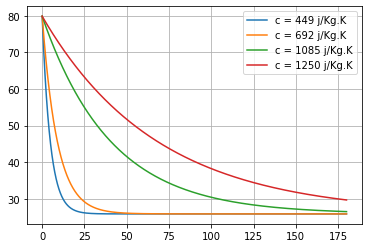

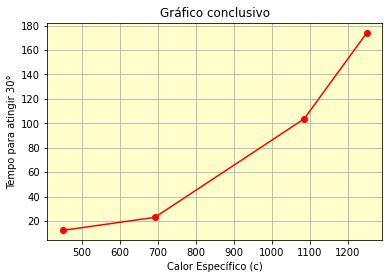

In [10]:

def modelo2(x, t, cx, hp):
    Tc = x[0]
    Tx = x[1]
    Qs = (Tc - Ta) / (1 / (hs * As))
    Qr = (Tc - Tx) / (dr/(kr * Ar))
    Qp = (Tx - Ta) / ((dr / (kr * Ar)) + (1 / (hp * Ap)))
    dTcdt = (-Qs - Qr) / (ma * ca)
    dTxdt = (Qr - Qp) / (mx * cx)
    dxdt = [dTcdt , dTxdt]
    return dxdt

def TempoAte30graus(listaTemperatura, listaTempo):
    #vamos iniciar com valor máximo
    tempobuscado=0  
    for i, temperatura in enumerate(listaTemperatura):
        if temperatura <= 30:
            tempobuscado=listaTempo[i]
            break
    return tempobuscado

listaz = { 449: 10, 692: 8, 1085:2, 1250:1 }
listaz2 = [449, 692, 1085, 1250]
lisTemposAte30=[]
for z in listaz:
    Solucao = odeint(modelo2, ci, lisTempo, args=(z,listaz[z],))
    lisTempCelsius=[temp-273.15 for temp in Solucao[:,0]]
    lisTempoH=[t/60 for t in lisTempo]
    plt.plot(lisTempoH, lisTempCelsius, label= "c = {} j/Kg.K".format(z))
    lisTemposAte30.append(TempoAte30graus(lisTempCelsius, lisTempoH))

   

    
plt.grid(True)
plt.legend()   
plt.show()
    
ax=plt.axes()
ax.set_facecolor('xkcd:ivory')
plt.title("Gráfico conclusivo")
plt.plot(listaz2, lisTemposAte30, 'r-o')
plt.xlabel("Calor Específico (c)")
plt.ylabel("Tempo para atingir 30°")
plt.grid(True)
plt.show()

    





